# Etiquedao y Entrenamiento del modelo

In [1]:
! pip install tensorflow


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models #type: ignore
from tensorflow.keras.preprocessing.image import load_img, img_to_array #type: ignore
from tensorflow.keras.utils import to_categorical #type: ignore
import numpy as np
import matplotlib.pyplot as plt
import os, random


In [2]:
class ImageDataset:
    def __init__(self, data_dir):
        self.data_dir = data_dir
        self.images = []
        self.labels = []
        self.label_names = [
            'sana', 
            'Common Rust in corn Leaf', 
            'Blight in corn leaf', 
            'Tomato Bacterial spot',
            'Tomato Early blight',
            'Tomato Late blight',
            'Potato Early blight',
            'Potato Late blight',
            'Cabbage looper',
            'Liriomyza sativae'
        ]


    def load_data(self):
        # Definir las clases de plagas (incluyendo sana como clase 0)
        labels = [
            'sana', 
            'Common_Rust_in_corn_Leaf', 
            'Blight_in_corn_leaf', 
            'Tomato_Bacterial_spot',
            'Tomato_Early_blight',
            'Tomato_Late_blight',
            'Potato_Early_blight',
            'Potato_Late_blight',
            'Cabbage_looper',
            'Liriomyza_sativae'  # Mosca minadora
        ]
        
        for label in labels:
            label_dir = os.path.join(self.data_dir, label)
            print(f"Buscando imágenes en: {label_dir}")
            if os.path.exists(label_dir):
                print(f"Directorio encontrado: {label_dir}")
                for image_name in os.listdir(label_dir):
                    img_path = os.path.join(label_dir, image_name)
                    img_array = self.load_and_preprocess_image(img_path)
                    if img_array is not None:
                        self.images.append(img_array)
                        self.labels.append(self.assign_label(label))

    def load_and_preprocess_image(self, img_path):
        try:
            img = load_img(img_path, target_size=(224, 224))  # Redimensionar
            img_array = img_to_array(img) / 255.0  # Normalizar
            return img_array
        except OSError as e:
            print(f"Error al cargar la imagen {img_path}: {e}")
            return None

    def assign_label(self, label):
        # Asignar etiquetas enteras para cada clase de plaga
        label_map = {
            'sana': 0,
            'Common_Rust_in_corn_Leaf': 1,
            'Blight_in_corn_leaf': 2,
            'Tomato_Bacterial_spot': 3,
            'Tomato_Early_blight': 4,
            'Tomato_Late_blight': 5,
            'Potato_Early_blight': 6,
            'Potato_Late_blight': 7,
            'Cabbage_looper': 8,
            'Liriomyza_sativae': 9  # Mosca minadora
        }
        return label_map.get(label, -1)  # Retorna -1 si la clase no está definida
    
    
    def show_random_images(self, num_images=5):
        if len(self.images) == 0:
            print("No hay imágenes cargadas.")
            return
        num_images = min(num_images, len(self.images))
        random_indices = random.sample(range(len(self.images)), num_images)
        plt.figure(figsize=(15, 10))
        for i, idx in enumerate(random_indices):
            img = self.images[idx]
            label = self.labels[idx]
            label_name = self.label_names[label]
            plt.subplot(1, num_images, i + 1)
            plt.imshow(img)
            plt.title(label_name)
            plt.axis('off')
        plt.show()

In [3]:
dataset = ImageDataset('Data_Procesada')  # Usa la ruta correcta para tus datos
dataset.load_data()


Buscando imágenes en: Data_Procesada\sana
Directorio encontrado: Data_Procesada\sana
Buscando imágenes en: Data_Procesada\Common_Rust_in_corn_Leaf
Directorio encontrado: Data_Procesada\Common_Rust_in_corn_Leaf
Buscando imágenes en: Data_Procesada\Blight_in_corn_leaf
Directorio encontrado: Data_Procesada\Blight_in_corn_leaf
Buscando imágenes en: Data_Procesada\Tomato_Bacterial_spot
Directorio encontrado: Data_Procesada\Tomato_Bacterial_spot
Buscando imágenes en: Data_Procesada\Tomato_Early_blight
Directorio encontrado: Data_Procesada\Tomato_Early_blight
Buscando imágenes en: Data_Procesada\Tomato_Late_blight
Directorio encontrado: Data_Procesada\Tomato_Late_blight
Buscando imágenes en: Data_Procesada\Potato_Early_blight
Directorio encontrado: Data_Procesada\Potato_Early_blight
Buscando imágenes en: Data_Procesada\Potato_Late_blight
Directorio encontrado: Data_Procesada\Potato_Late_blight
Buscando imágenes en: Data_Procesada\Cabbage_looper
Buscando imágenes en: Data_Procesada\Liriomyza_s

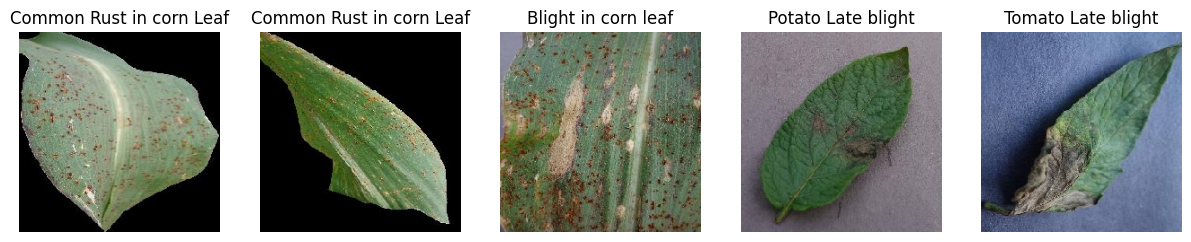

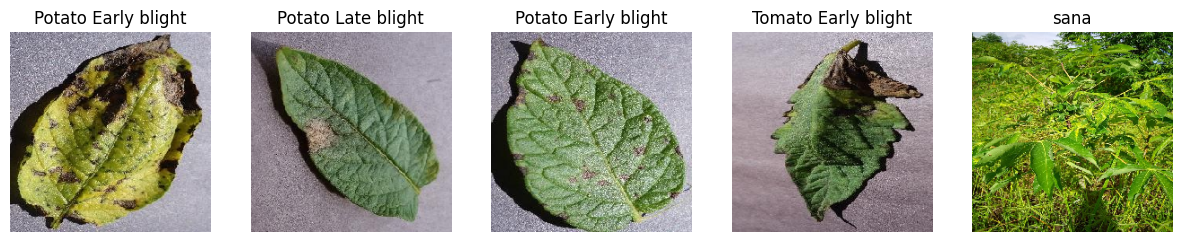

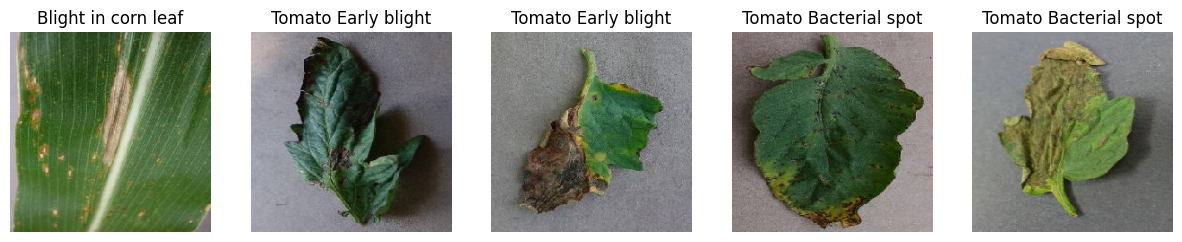

In [4]:
# Mostrar imágenes aleatorias
dataset.show_random_images(num_images=5) 
dataset.show_random_images(num_images=5)
dataset.show_random_images(num_images=5)

In [5]:
import os
import pandas as pd

image_counts = []

data_dir = "Data_Procesada"

folders = [f for f in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, f))]

for folder in folders:
    folder_path = os.path.join(data_dir, folder)

    # Listar solo archivos (no carpetas) dentro de la carpeta
    all_files = [f for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

    image_counts.append({'Folder': folder, 'Image Count': len(all_files)})

df = pd.DataFrame(image_counts)
print(df)


                     Folder  Image Count
0       Blight_in_corn_Leaf         1330
1  Common_Rust_in_corn_Leaf         1346
2         Liriomyza sativae         1557
3       Potato_Early_blight         1307
4        Potato_Late_blight         1309
5                      sana         1526
6     Tomato_Bacterial_spot         1418
7       Tomato_Early_blight         1316
8        Tomato_Late_blight         1404


In [6]:
import os, time, datetime
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import ResNet50 # type: ignore
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.callbacks import EarlyStopping # type: ignore
from tensorflow.keras.metrics import AUC, F1Score # type: ignore
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import load_img, img_to_array # type: ignore
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.optimizers.schedules import ExponentialDecay # type: ignore
from tensorflow.keras.optimizers import Adam # type: ignore
from tensorflow.keras.regularizers import l2 # type: ignore
from tensorflow.keras.models import load_model  # type: ignore
from tensorflow.keras.callbacks import TensorBoard # type: ignore

In [7]:
class ResNetModel:
    def __init__(self, num_classes=10):
        """Usamos ResNet50 como base y agregamos capas de salida para multiclase."""
        base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

        for layer in base_model.layers[-15:]:
            layer.trainable = True

        self.model = models.Sequential([
            base_model,
            layers.GlobalAveragePooling2D(),
            layers.Dropout(0.3),
            layers.Dense(512, activation='relu', kernel_regularizer=l2(0.001)),
            layers.Dense(256, activation='relu', kernel_regularizer=l2(0.001)),
            layers.Dense(128, activation='relu', kernel_regularizer=l2(0.001)),
            layers.Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
            layers.Dense(num_classes, activation='softmax')  # Salida multiclase
        ])

    def compile(self):
        """Compila el modelo para clasificación multiclase."""
        lr_schedule = ExponentialDecay(
            initial_learning_rate=0.001,
            decay_steps=50000,
            decay_rate=0.96,
            staircase=True
        )
        optimizer = Adam(learning_rate=lr_schedule)
        self.model.compile(
            optimizer=optimizer,
            loss='categorical_crossentropy',  # o 'sparse_categorical_crossentropy' si etiquetas son enteras
            metrics=['accuracy', AUC(multi_label=True)]  # Puedes ajustar métricas según necesites
        )

    def train(self, X_train, y_train, X_val, y_val, epochs=6, batch_size=32):
        early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
        log_dir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
        tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)

        print("Iniciando el entrenamiento del modelo...")
        history = self.model.fit(
            X_train, y_train,
            batch_size=batch_size,
            epochs=epochs,
            validation_data=(X_val, y_val),
            callbacks=[early_stopping, tensorboard_callback],
            verbose=1
        )
        return history

    def evaluate(self, X_val, y_val):
        loss, accuracy, auc = self.model.evaluate(X_val, y_val)
        print(f'Pérdida: {loss}, Accuracy: {accuracy}, AUC: {auc}')
        return loss, accuracy, auc

    def save(self, model_name='modelo_entrenado_resnet_multiclase.h5'):
        self.model.save(model_name)


In [8]:
X = np.array(dataset.images)         # Shape: (num_samples, 224, 224, 3)
y = np.array(dataset.labels)         # Shape: (num_samples,)

# Convertir etiquetas a one-hot para multiclase
num_classes = 9
y_onehot = to_categorical(y, num_classes=num_classes)

In [9]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y_onehot, test_size=0.2, random_state=42, stratify=y
)


In [10]:
model = ResNetModel(num_classes=num_classes)
model.compile()

In [11]:
history = model.train(X_train, y_train, X_val, y_val, epochs=100, batch_size=32)
model.evaluate(X_val, y_val)


Iniciando el entrenamiento del modelo...
Epoch 1/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2507s 8s/step - accuracy: 0.7296 - auc: 0.8346 - loss: 1.9799 - val_accuracy: 0.1282 - val_auc: 0.4150 - val_loss: 5.0847
Epoch 2/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2161s 8s/step - accuracy: 0.8984 - auc: 0.8796 - loss: 0.8162 - val_accuracy: 0.1282 - val_auc: 0.4875 - val_loss: 4.6254
Epoch 3/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2182s 8s/step - accuracy: 0.9369 - auc: 0.8850 - loss: 0.4826 - val_accuracy: 0.4279 - val_auc: 0.7019 - val_loss: 2.2878
Epoch 4/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2177s 8s/step - accuracy: 0.9506 - auc: 0.8860 - loss: 0.3550 - val_accuracy: 0.7071 - val_auc: 0.8324 - val_loss: 1.4304
Epoch 5/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2156s 8s/step - accuracy: 0.9513 - auc: 0.8859 - loss: 0.3053 - val_accuracy: 0.7568 - val_auc: 0.8621 - val_loss: 0.8961
Epoch 6/100
274/274 ━━━━━━━━━━━━━━━━━━━━ 2177s 8s/step - accuracy: 0.9535 - auc: 0.8858 - loss: 0.2874 - val_accuracy: 0.8859 - val_auc: 0.8771 

(0.1939529925584793, 0.9616788029670715, 0.8846411108970642)

In [12]:
model.save('modelo_entrenado_resnet_multiclase.h5')

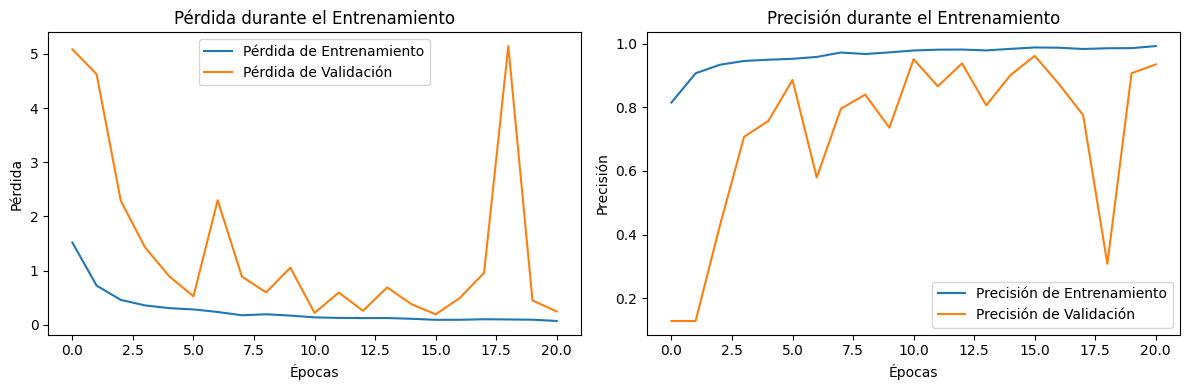

In [14]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    """Visualiza la historia del entrenamiento."""
    plt.figure(figsize=(12, 4))

    # Pérdida
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Pérdida de Entrenamiento')
    plt.plot(history.history['val_loss'], label='Pérdida de Validación')
    plt.title('Pérdida durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Pérdida')
    plt.legend()

    # Precisión
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Precisión de Entrenamiento')
    plt.plot(history.history['val_accuracy'], label='Precisión de Validación')
    plt.title('Precisión durante el Entrenamiento')
    plt.xlabel('Épocas')
    plt.ylabel('Precisión')
    plt.legend()

    plt.tight_layout()
    plt.show()
    
plot_training_history(history)

In [15]:
import numpy as np

# Predecir probabilidades
y_pred_probs = model.model.predict(X_val)

# Obtener etiquetas predichas (índice de la clase con mayor probabilidad)
y_pred = np.argmax(y_pred_probs, axis=1)

# Obtener etiquetas reales (de one-hot a etiqueta numérica)
y_true = np.argmax(y_val, axis=1)


69/69 ━━━━━━━━━━━━━━━━━━━━ 117s 1s/step


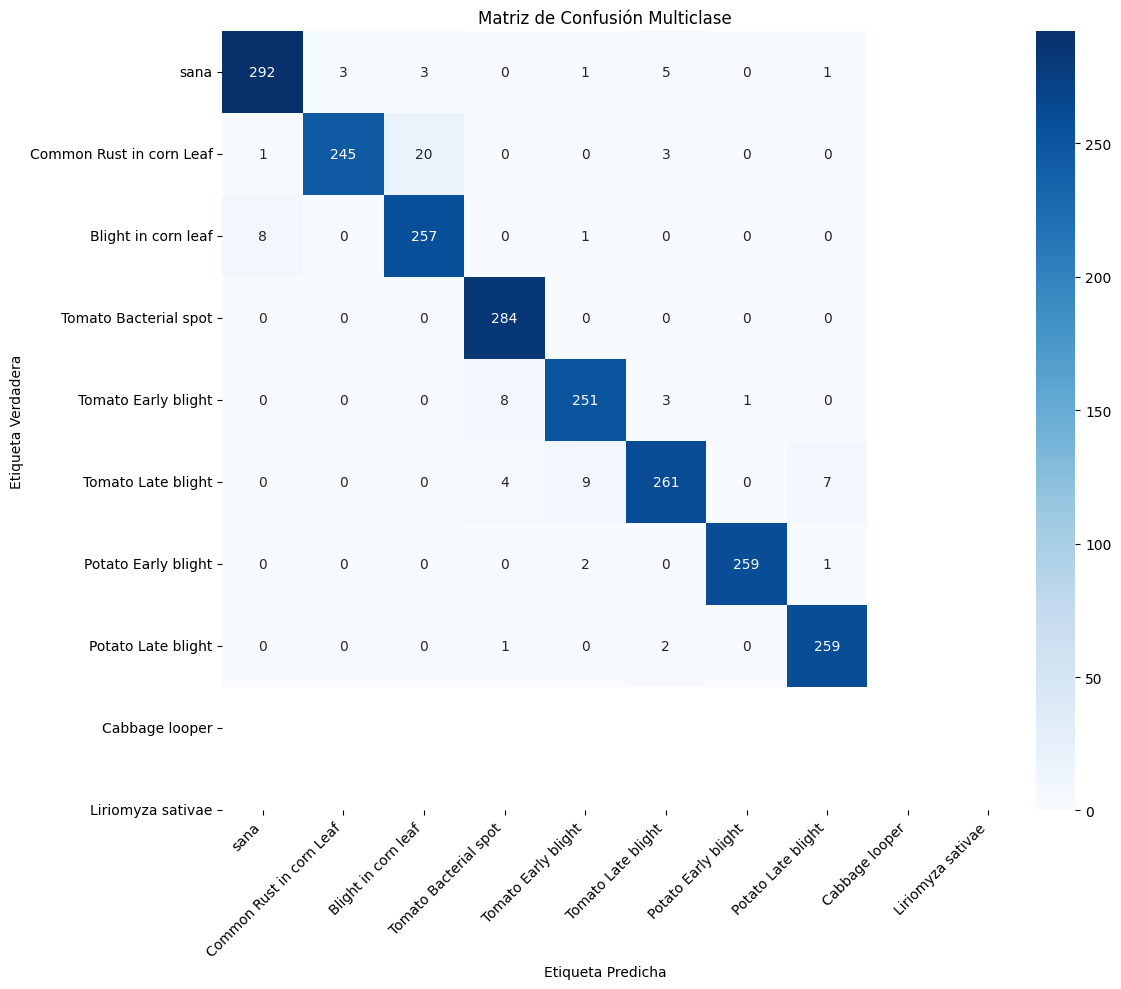

In [17]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Supongamos que ya tienes tus y_true y y_pred como vectores de enteros 0–9
# y que las etiquetas corresponden a este orden:
class_names = [
    'sana', 
    'Common Rust in corn Leaf', 
    'Blight in corn leaf', 
    'Tomato Bacterial spot',
    'Tomato Early blight',
    'Tomato Late blight',
    'Potato Early blight',
    'Potato Late blight',
    'Cabbage looper',
    'Liriomyza sativae'
]

# Calcula la matriz de confusión
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(12,10))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=class_names, 
    yticklabels=class_names
)

plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Verdadera')
plt.title('Matriz de Confusión Multiclase')
plt.xticks(rotation=45, ha='right')  # Rota las etiquetas del eje x para mayor legibilidad
plt.yticks(rotation=0)               # Mantén las etiquetas del eje y horizontales
plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 163ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step


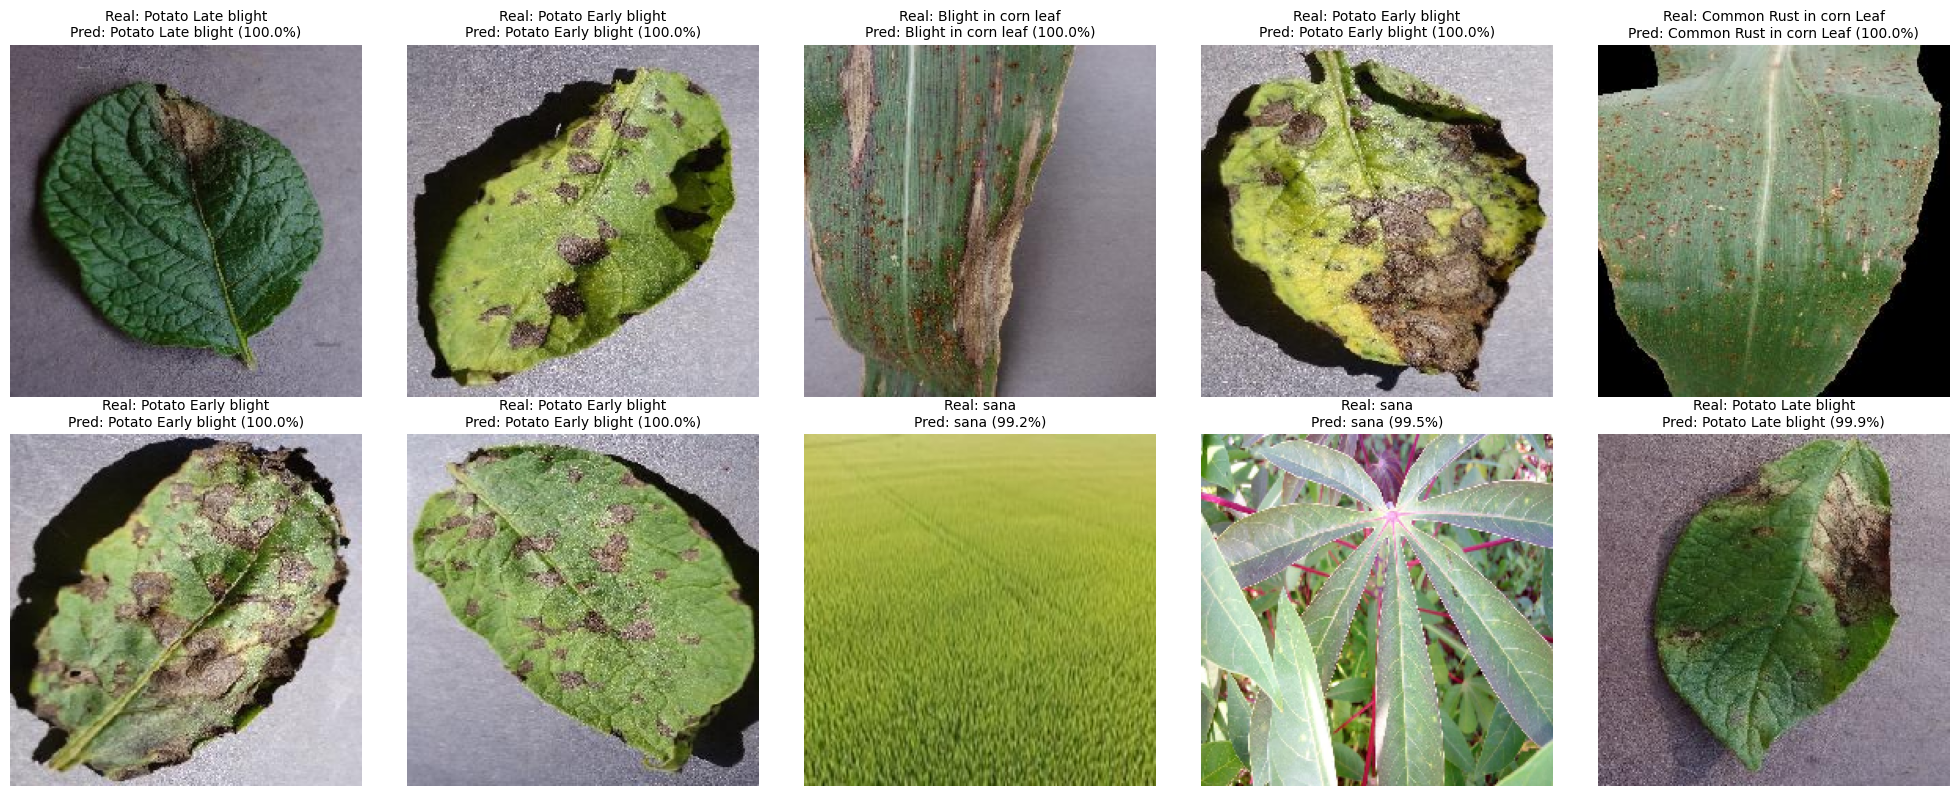

In [27]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Seleccionar 10 índices aleatorios del conjunto de validación
num_imagenes = 10
indices = random.sample(range(len(X_val)), num_imagenes)

# Etiquetas de las clases (en el mismo orden que usas para codificar y_true/y_pred)
class_names = [
    'sana', 
    'Common Rust in corn Leaf', 
    'Blight in corn leaf', 
    'Tomato Bacterial spot',
    'Tomato Early blight',
    'Tomato Late blight',
    'Potato Early blight',
    'Potato Late blight',
    'Cabbage looper',
    'Liriomyza sativae'
]

plt.figure(figsize=(20, 8))

for i, idx in enumerate(indices):
    img = X_val[idx]
    true_label = np.argmax(y_val[idx])      # etiqueta real 0–9
    img_input = np.expand_dims(img, axis=0) # batch=1
    pred_probs = model.model.predict(img_input)
    pred_label = np.argmax(pred_probs[0])   # predicción 0–9

    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(
        f"Real: {class_names[true_label]}\n"
        f"Pred: {class_names[pred_label]} ({pred_probs[0][pred_label]:.1%})",
        fontsize=10
    )

plt.tight_layout()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


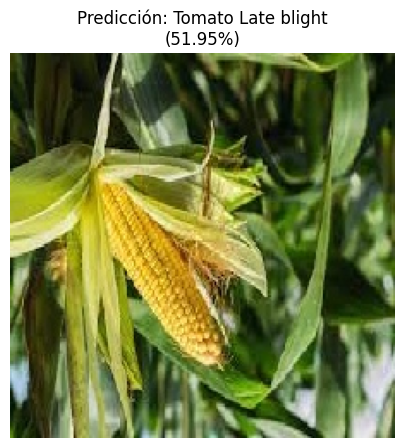

Shape de la imagen procesada: (224, 224, 3)
Predicción cruda (probabilidades): [3.9919105e-01 9.6416194e-03 1.7940426e-02 5.6335032e-03 4.3698914e-02
 5.1954448e-01 1.4949979e-03 2.8496583e-03 5.3603685e-06]
Predicción final: Tomato Late blight con probabilidad 0.5195


In [26]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model  # type: ignore
from tensorflow.keras.preprocessing import image  # type: ignore

# 1️⃣ Carga el modelo desde el archivo .h5
modelo_cargado = load_model('modelo_entrenado_resnet_multiclase.h5')

# 2️⃣ Ruta de la imagen a probar
img_path = 'Data\\Image Data base\\corn crop\\corn_crop5.jpg'  # Ajusta la ruta según tu sistema

# 3️⃣ Etiquetas de las clases (0–9)
clases = [
    'sana', 
    'Common Rust in corn Leaf', 
    'Blight in corn leaf', 
    'Tomato Bacterial spot',
    'Tomato Early blight',
    'Tomato Late blight',
    'Potato Early blight',
    'Potato Late blight',
    'Cabbage looper',
    'Liriomyza sativae'
]

# 4️⃣ Cargar imagen y redimensionar a 224×224
img = image.load_img(img_path, target_size=(224, 224))

# 5️⃣ Convertir imagen a array numpy
img_array = image.img_to_array(img)

# 6️⃣ Expandir dimensiones para batch y normalizar
img_array_expanded = np.expand_dims(img_array, axis=0) / 255.0

# 7️⃣ Realizar la predicción
prediccion = modelo_cargado.predict(img_array_expanded)

# 8️⃣ Obtener índice de la clase con mayor probabilidad
indice_clase = np.argmax(prediccion[0])

# 9️⃣ Obtener etiqueta y probabilidad
etiqueta_predicha = clases[indice_clase]
probabilidad = prediccion[0][indice_clase]

# 🔟 Mostrar imagen y resultado
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.axis('off')
plt.title(f"Predicción: {etiqueta_predicha}\n({probabilidad:.2%})")
plt.show()

# 1️⃣1️⃣ Mostrar detalles en consola
print(f"Shape de la imagen procesada: {img_array.shape}")
print(f"Predicción cruda (probabilidades): {prediccion[0]}")
print(f"Predicción final: {etiqueta_predicha} con probabilidad {probabilidad:.4f}")
